# Chapter 6 - Exercises

### 1. Set up a random experiment to test the difference between a sequential search and a binary search on a list of integers.

Let's first import the necesssary libraries and define both searching algorithms.

In [17]:
import time 
import random 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

def sequential_search(ls, e, is_sorted=False):
    for i, n in enumerate(ls):
        if e == n:
            return i

        if is_sorted and ls[i] > e:
            break 

    return -1

def binary_search(ls, e):
    low = 0
    high = len(ls) - 1

    while low <= high:
        mid = (low + high) // 2 
        if e < ls[mid]:
            high = mid - 1
        elif e > ls[mid]:
            low = mid + 1
        else:
            return mid

    return -1 
    

Let's now set up the experiment, by generating random ordered list (we need them for binary search, otherwise we would not get deterministic results). First let's start with values that really are inside the array.

In [18]:
def simulate_searches(max_size_exp=6, n_simulations=10):
    sizes = [10 ** i for i in range(1, max_size_exp + 1)]
    access_sequential = []
    access_binary = []

    for size in sizes:
        for sim in range(n_simulations):
            sequential = []
            binary = []
            a = random.sample(range(size), size)
            a.sort()
            idx = random.randint(0, size - 1)
            element = a[idx]

            b = time.time()
            _ = sequential_search(a, element, is_sorted=True)
            e = time.time()
            sequential += [e - b]

            b = time.time()
            _ = binary_search(a, element)
            e = time.time()
            binary += [e - b]
        
        access_sequential += [np.array(sequential).mean()]
        access_binary += [np.array(binary).mean()]

    return pd.DataFrame({"sequential": access_sequential, "binary": access_binary})

times = simulate_searches(7, 5)

Now let's plot the access times. On the x-axis we have the power to which we are raising 10 to get the input size of the array (`size = 10 ** (x + 1)`) and on the y axis the time in seconds needed to complete the search. In all cases, elements are found inside the array.

<AxesSubplot:>

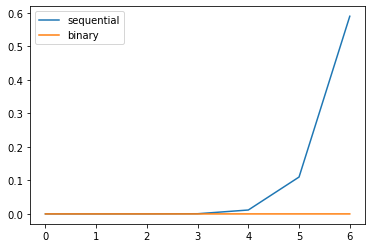

In [19]:
times.plot()

We see how sequential search takes a huge amount of time (it's exponential because sizes are increasing in an exponential fashion, but it would be linear), while binary search has a very mild increase which is not evident for such a huge case. Feel free to experiment with bigger sizes keeping in mind that it will take more time.
It would be great to also experiment with a linearly increasing size as well as different scenarios (for example where elements are not found), I will try to make a more complete experiment over the next questions.

### 2. Use the binary search functions given in the text (recursive and iterative). Generate a random, ordered list of integers and do a benchmark analysis for each one. What are your results? Can you explain them?

Let's first define a recursive binary search function.

In [20]:
def recursive_binary_search(ls, e):
    if len(ls) == 0:
        return False
    else:
        mid = len(ls) // 2 

        if e < ls[mid]:
            return recursive_binary_search(ls[:mid], e)
        elif e > ls[mid]:
            return recursive_binary_search(ls[mid + 1:], e)
        else:
            return True



Now let's do some simulations.

In [21]:
def simulate_binary_searches(max_size_exp=6, n_simulations=10):
    sizes = [10 ** i for i in range(1, max_size_exp + 1)]
    access_recursive = []
    access_iterative = []

    for size in sizes:
        for sim in range(n_simulations):
            recursive = []
            iterative = []
            a = random.sample(range(size), size)
            a.sort()
            idx = random.randint(0, size - 1)
            element = a[idx]

            b = time.time()
            _ = binary_search(a, element)
            e = time.time()
            iterative += [e - b]

            b = time.time()
            _ = recursive_binary_search(a, element)
            e = time.time()
            recursive += [e - b]
        
        access_recursive += [np.array(recursive).mean()]
        access_iterative += [np.array(iterative).mean()]

    return pd.DataFrame({"recursive": access_recursive, "iterative": access_iterative})

times_binary = simulate_binary_searches(7, 5)


Let's now plot the access times.

<AxesSubplot:>

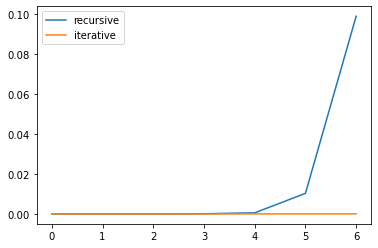

In [22]:
times_binary.plot()

As expected the recursive approach time increases with size in an exponential fashion due to the overhead of sub-calling the routine itself.

### 3. Implement the binary search using recursion without the slice operator. Recall that you will need to pass the list along with the starting and ending index values for the sublist. Generate a random, ordered list of integers and do a benchmark analysis.

Let's first define such a function.

In [23]:
def recursive_binary_search_no_slice(ls, e, low=None, high=None):
    if low is None:
        low = 0
    
    if high is None:
        high = len(ls)
        
    if low == high:
        return False
    else:
        mid = (low + high) // 2
        if e < ls[mid]:
            return recursive_binary_search_no_slice(ls, e, low, mid)
        elif e > ls[mid]:
            return recursive_binary_search_no_slice(ls, e, mid + 1, high)
        else:
            return True

recursive_binary_search_no_slice([1, 2, 3, 4, 5], 4)

True

Let's now generate a benchmark analysis.

In [24]:
def simulate_recursive_binary_searches(max_size_exp=6, n_simulations=10):
    sizes = [10 ** i for i in range(1, max_size_exp + 1)]
    access_slice = []
    access_no_slice = []

    for size in sizes:
        for sim in range(n_simulations):
            with_slice = []
            no_slice = []
            a = random.sample(range(size), size)
            a.sort()
            idx = random.randint(0, size - 1)
            element = a[idx]

            b = time.time()
            _ = recursive_binary_search(a, element)
            e = time.time()
            with_slice += [e - b]

            b = time.time()
            _ = recursive_binary_search_no_slice(a, element)
            e = time.time()
            no_slice += [e - b]
        
        access_slice += [np.array(with_slice).mean()]
        access_no_slice += [np.array(no_slice).mean()]

    return pd.DataFrame({"slice": access_slice, "no_slice": access_no_slice})

times_recursive_binary = simulate_recursive_binary_searches(7, 5)

Let's now compare the two.

<AxesSubplot:>

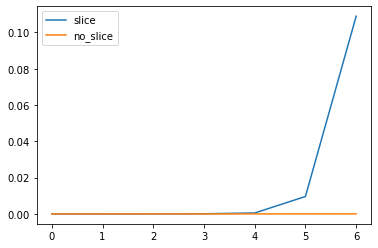

In [25]:
times_recursive_binary.plot()

Non slicing holds a smaller access time compared to the version of the search which slices up the array.

### 4. Implement the `len` method (`__len__`) for the hash table Map ADT implementation.

Let's retrieve the full code from the textbook and implement it.

In [28]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self, key, data):
        hash_value = self.hash_function(key, len(self.slots))

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data  # replace
            else:
                next_slot = self.rehash(hash_value, len(self.slots))
                while (
                    self.slots[next_slot] is not None
                    and self.slots[next_slot] != key
                ):
                    next_slot = self.rehash(next_slot, len(self.slots))

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def hash_function(self, key, size):
        return key % size

    def rehash(self, old_hash, size):
        return (old_hash + 1) % size

    def get(self, key):
        start_slot = self.hash_function(key, len(self.slots))

        position = start_slot
        while self.slots[position] is not None:
            if self.slots[position] == key:
                return self.data[position]
            else:
                position = self.rehash(position, len(self.slots))
                if position == start_slot:
                    return None

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, data):
        self.put(key, data)

    def __len__(self):
        return sum([int(s is not None) for s in self.slots])
        

### 5. Implement the `in` method (`__contains__`) for the hash table Map ADT implementation.

Let's answer below.

In [1]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self, key, data):
        hash_value = self.hash_function(key, len(self.slots))

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data  # replace
            else:
                next_slot = self.rehash(hash_value, len(self.slots))
                while (
                    self.slots[next_slot] is not None
                    and self.slots[next_slot] != key
                ):
                    next_slot = self.rehash(next_slot, len(self.slots))

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def hash_function(self, key, size):
        return key % size

    def rehash(self, old_hash, size):
        return (old_hash + 1) % size

    def get(self, key):
        start_slot = self.hash_function(key, len(self.slots))

        position = start_slot
        while self.slots[position] is not None:
            if self.slots[position] == key:
                return self.data[position]
            else:
                position = self.rehash(position, len(self.slots))
                if position == start_slot:
                    return None

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, data):
        self.put(key, data)

    def __len__(self):
        return sum([int(s is not None) for s in self.slots])

    def __contains__(self, key):
        return key in self.slots
        

### 6. How can you delete items from a hash table that uses chaining for collision resolution? How about if open addressing is used? What are the special circumstances that must be handled? Implement the `del` method for the `HashTable` class.

Since we are using chaining, we might push, due to the circularity of the data structure, some data before the actual key we want to remove. Therefore, what I did is to remove the required key-value pair, as well as all the key-value pairs that would hash to the freed position. These last ones however are saved in two auxillary arrays, so we can hash them back (through the `put` method). This is the easiest and quickest way, though it requires some memory and calling `put()`.

In [32]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self, key, data):
        hash_value = self.hash_function(key, len(self.slots))

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data  # replace
            else:
                next_slot = self.rehash(hash_value, len(self.slots))
                while (
                    self.slots[next_slot] is not None
                    and self.slots[next_slot] != key
                ):
                    next_slot = self.rehash(next_slot, len(self.slots))

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def hash_function(self, key, size):
        return key % size

    def rehash(self, old_hash, size):
        return (old_hash + 1) % size

    def get(self, key):
        start_slot = self.hash_function(key, len(self.slots))

        position = start_slot
        while self.slots[position] is not None:
            if self.slots[position] == key:
                return self.data[position]
            else:
                position = self.rehash(position, len(self.slots))
                if position == start_slot:
                    return None

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, data):
        self.put(key, data)

    def __len__(self):
        return sum([int(s is not None) for s in self.slots])

    def __contains__(self, key):
        return key in self.slots

    def __delitem__(self, key):
        position = self.slots.index(key)
        if position >= 0:
            self.slots[position] = None
            self.data[position] = None
            collided_keys = []
            collided_values = []
            
            for i, k in enumerate(self.slots):
                if k is not None and self.hash_function(k, self.size) == position:
                    collided_keys += [k]
                    collided_values += [self.data[i]]
                    self.slots[i] = None
                    self.data[i] = None

            for k, v in zip(collided_keys, collided_values):
                self.put(k, v)
                